###Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importing data

In [3]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

**Part 2:**\
Question 1:

In [4]:
income94.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
income94.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
income94.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


From the information above and the provided text description, the data types are all expected and organized well.

Question 2:

From the text description of this data, we know that the missing values are all replaced by "?"

In [8]:
##check if the missing value is null
income94.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country        0
gross_income_group    0
dtype: int64

In [9]:
income94 = income94.replace('[?]', np.nan, regex=True)

In [10]:
income94.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

The number of the missing value is 1836 in workclass, 1843 in occupation, and 583 in native_country.

Question 3:

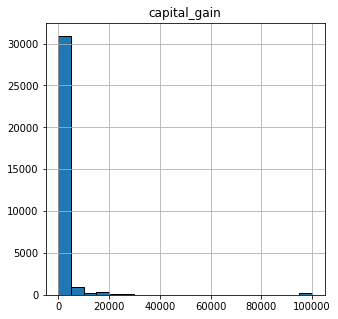

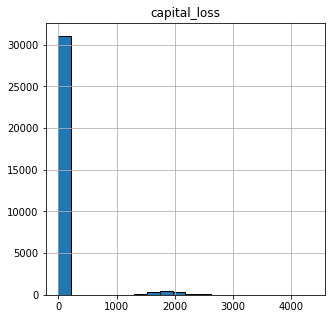

In [11]:
income94.hist(figsize=(5, 5), bins=20, edgecolor="black", column='capital_gain')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

income94.hist(figsize=(5, 5), bins=20, edgecolor="black", column='capital_loss')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

I think these variables should be categorical values because most of them are zero and the shape is skewed right, which means that they have no capital gain or loss.

In [12]:
df = income94
gain = pd.cut(df.capital_gain, bins=[-1, 1, 100000], labels=['non-capitalist', 'capitalist'])
loss = pd.cut(df.capital_loss, bins=[-1, 1, 3500], labels=['non-capitalist', 'capitalist'])

gain.value_counts()

non-capitalist    29849
capitalist         2712
Name: capital_gain, dtype: int64

In [13]:
loss.value_counts()

non-capitalist    31042
capitalist         1510
Name: capital_loss, dtype: int64

From the two tables above, it is clear that more than 90% of the participants are not obtaining the revenue from capital events.

Question 4:

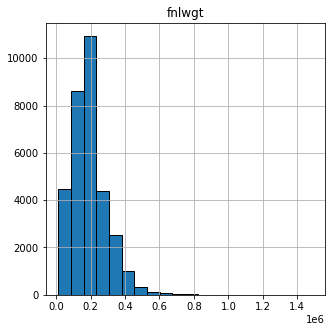

In [14]:
income94.hist(figsize=(5, 5), bins=20, edgecolor="black", column='fnlwgt')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [15]:
income94['fnlwgt'].mean()

189778.36651208502

In [16]:
income94['fnlwgt'].median()

178356.0

Even though the mean value and the median value of this variable are closed to each other, this variable is still not symmetrically distributed. The reason is that the shape of its histogram is skewed right.\
By looking at the trends between men and women, many people believe that men gain more than women; which also means that there are many outliers in this variable. However, I think if we are discovering about whether men gain more than women, then we should not took out those outliers. Otherwise, it would be suggested to took out those outliers.

**Correlation:**

In [17]:
var = ["age", "education_num", "hours_per_week"]
income94[var].describe()

,age,education_num,hours_per_week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [18]:
income94[var].corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


a). I used .describe and .corr to see the pairwise correaltions. From the table above, we know that any two pairs of those three variables are having positive correlation, but their correlation is weak since all the r scores is lower than 0.2.

In [19]:
new_var = ["education_num", "hours_per_week"]
income94[new_var].corr()

,education_num,hours_per_week
education_num,1.000000,0.148123
hours_per_week,0.148123,1.000000


b).

In [20]:
stat, p = stats.pearsonr(income94['hours_per_week'], income94['education_num'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.148, p=0.000


To make a hypothesis test, we first set our null hypothesis to be: The difference between means of hours per week and number of education is none.
The alternative hypothesis is: There is differences between those two groups. 

By using pearson method to test the p value, we find out that the p-value is super sumall which is almost zero. In this case, we will reject the null hypothesis; which means that there is a significant difference between means of hours per week and number of education.

c).

In [21]:
income94.groupby(['sex']).corr()

age    fnlwgt  ...  capital_loss  hours_per_week
sex                                         ...                              
 Female age             1.000000 -0.054676  ...      0.041708        0.081257
        fnlwgt         -0.054676  1.000000  ...     -0.021318        0.006913
        education_num  -0.017899 -0.039808  ...      0.063829        0.178749
        capital_gain    0.056513 -0.001938  ...     -0.020720        0.028580
        capital_loss    0.041708 -0.021318  ...      1.000000        0.018379
        hours_per_week  0.081257  0.006913  ...      0.018379        1.000000
 Male   age             1.000000 -0.091810  ...      0.059658        0.034124
        fnlwgt         -0.091810  1.000000  ...     -0.007835       -0.040739
        education_num   0.060486 -0.045174  ...      0.085074        0.136782
        capital_gain    0.081893 -0.000594  ...     -0.037231        0.082725
        capital_loss    0.059658 -0.007835  ...      1.000000        0.055510
        hours_per_week  0.034124 -0.040739  ...      0.055510        1.000000

[12 rows x 6 columns]

From the table above, we can see that the r score between age and education_num is around -0.018 in females, 0.0605 in males. Therefore, we can say that the two variables in female groups are negatively correlated, while in male groups, those variables are positively correlated. Also, the correlation is more significant in males group.\
However, it is an expected result since males may get more educations while they growing up.


d).

In [22]:
income94[new_var].cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


In conclusion, the working hours per week has positive correlation with the number of educations.\
In plain language, you will get more hours to work when you have more number of educations.



**Linear Regression:**

In [23]:
reg = smf.ols('hours_per_week ~ C(sex)', data = income94).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:51:56   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.4104      0.116    3

a). The table above shows that men actually tend to work more than women.

In [30]:
reg2 = smf.ols('hours_per_week ~ C(sex) + education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        03:29:14   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          29.4106      0.281    1

b). The trend in working hours between men and women remain same, and the coefficient for the variable education_num is not statistically significant since it is around 0.7, while the coefficient of sex is around 6.0. The 95% confidence interval for education_num is (0.647, 0.748).

In [31]:
reg3 = smf.ols('hours_per_week ~ C(sex) + education_num + C(gross_income_group)', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        03:29:16   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

c). For the model with sex only, the coefficient is around 6.02.\
For the model with sex plus education_num, the coefficient is around 5.97.\
For the model with sex plus both education_num and gross_income_group, the coefficient is around 5.10.\
We can choose the best model by comparing their R^2. Here is the analysis

In [32]:
print(reg.mse_resid) 
print(reg2.mse_resid)
print(reg3.mse_resid) 

138.09108966554098
141.23145178884275
138.09108966554098


In this case, the best model is the reg2 which is the model with sex and education_num. However, the first model and the last model (reg and reg3) has the same R^2, but the first model that has sex as its only variable has the smallest std error, which is still a good choice compare to the other model.